In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import prewitt, roberts
from google.colab.patches import cv2_imshow

**Task-1:- In this task we will understand and manipulate an image.**

Image Size: 512x512, Channels: 3
Total Pixels: 262144
Area of Black Pixels: 128099


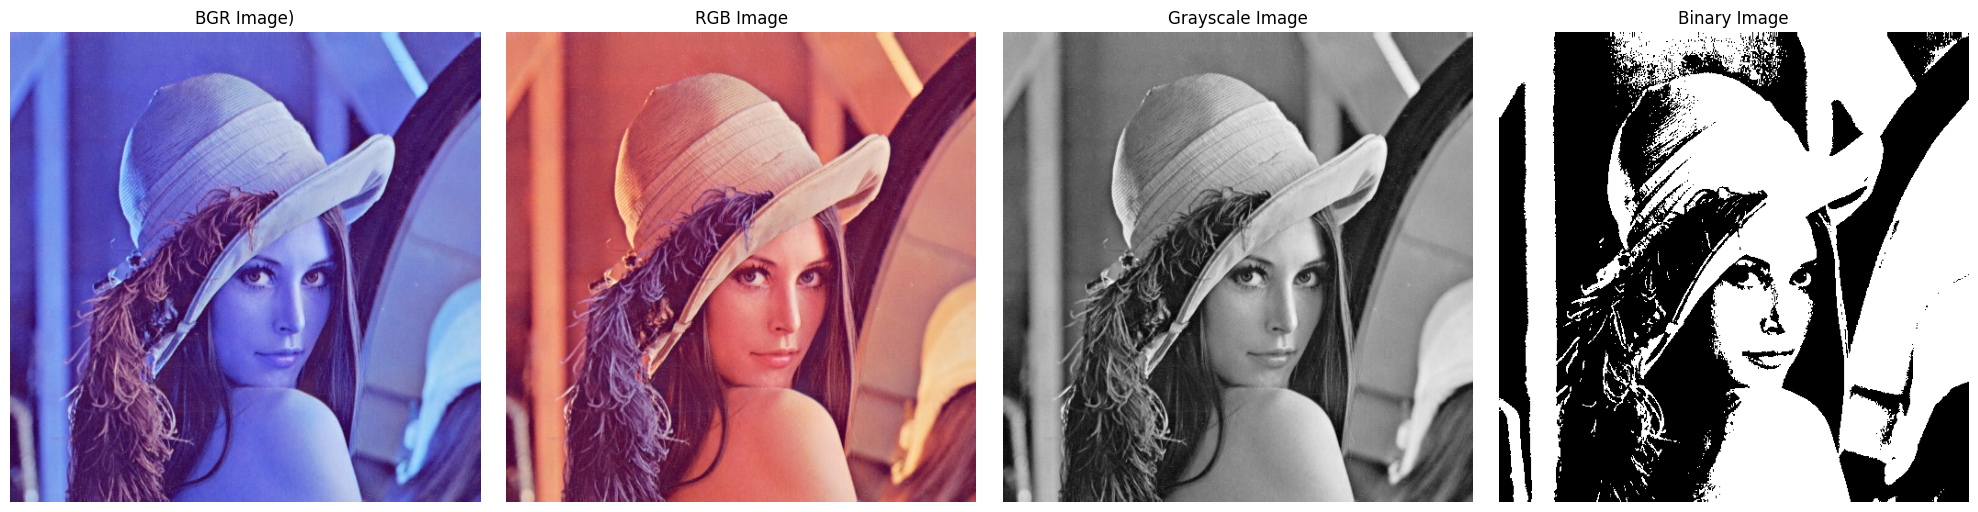

In [ ]:
class Solution:
    def processImage(self, image_path):
        # 1. Read the image
        bgr_image = cv2.imread(image_path)

        # Convert BGR to RGB
        rgb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)

        # 3. Extract Image size
        height, width, channels = bgr_image.shape
        print(f"Image Size: {width}x{height}, Channels: {channels}")

        # 4. Calculate image pixels
        total_pixels = height * width
        print(f"Total Pixels: {total_pixels}")

        # 5. Convert RGB to Grayscale image
        gray_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2GRAY)

        # 6. Convert Grayscale image to Binary using a threshold
        _, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

        # Count the area of black pixels
        black_pixel_count = np.sum(binary_image == 0)
        print(f"Area of Black Pixels: {black_pixel_count}")

        fig, axes = plt.subplots(1, 4, figsize=(20, 5))
        axes[0].imshow(bgr_image)
        axes[0].set_title("BGR Image)")
        axes[0].axis('off')

        axes[1].imshow(rgb_image)
        axes[1].set_title("RGB Image")
        axes[1].axis('off')

        axes[2].imshow(gray_image, cmap='gray')
        axes[2].set_title("Grayscale Image")
        axes[2].axis('off')

        axes[3].imshow(binary_image, cmap='gray')
        axes[3].set_title("Binary Image")
        axes[3].axis('off')

        plt.tight_layout()
        plt.show()

solution = Solution()
solution.processImage('/content/img1.jpeg')

**Task-2:- In this task we will understand and manipulate the properties of an image.**

<ipython-input-1-27b0b72c3c52>:10: RuntimeWarning: invalid value encountered in sqrt
  sobel_edge = np.sqrt(sobel_x*2 + sobel_y*2)
<ipython-input-1-27b0b72c3c52>:15: RuntimeWarning: invalid value encountered in sqrt
  prewitt_edge = np.sqrt(prewitt_x*2 + prewitt_y*2)
<ipython-input-1-27b0b72c3c52>:20: RuntimeWarning: invalid value encountered in sqrt
  roberts_edge = np.sqrt(roberts_x*2 + roberts_y*2)


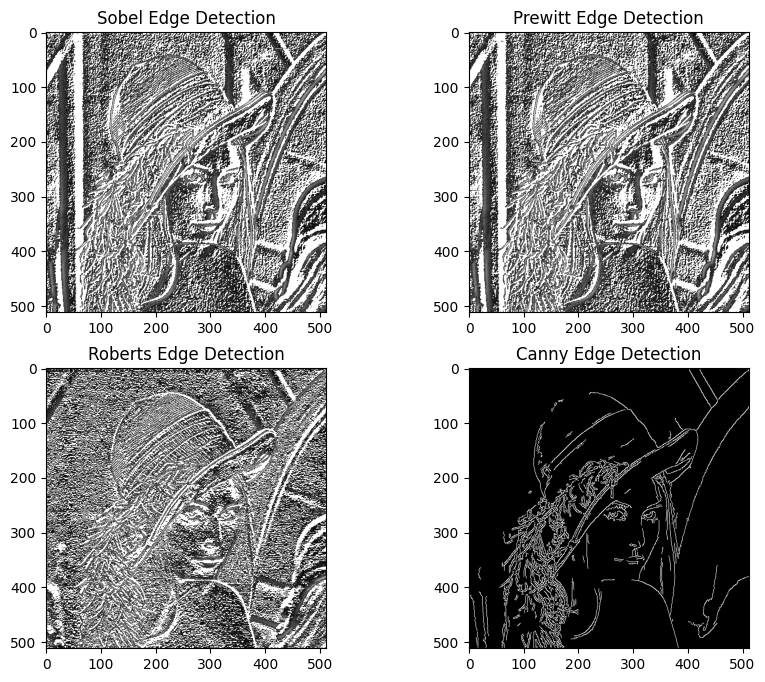

In [1]:
image = cv2.imread('/content/img1.jpeg', cv2.IMREAD_GRAYSCALE)

# Sobel Edge Detection
sobel_x = cv2.filter2D(image, cv2.CV_64F, np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]))
sobel_y = cv2.filter2D(image, cv2.CV_64F, np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]))
sobel_edge = np.sqrt(sobel_x*2 + sobel_y*2)

# Prewitt Edge Detection
prewitt_x = cv2.filter2D(image, cv2.CV_64F, np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]))
prewitt_y = cv2.filter2D(image, cv2.CV_64F, np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]))
prewitt_edge = np.sqrt(prewitt_x*2 + prewitt_y*2)

# Roberts Edge Detection
roberts_x = cv2.filter2D(image, cv2.CV_64F, np.array([[1, 0], [0, -1]]))
roberts_y = cv2.filter2D(image, cv2.CV_64F, np.array([[0, 1], [-1, 0]]))
roberts_edge = np.sqrt(roberts_x*2 + roberts_y*2)

# Canny Edge Detection
canny_edge = cv2.Canny(image, 100, 200)

plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1), plt.imshow(sobel_edge, cmap='gray'), plt.title("Sobel Edge Detection")
plt.subplot(2, 2, 2), plt.imshow(prewitt_edge, cmap='gray'), plt.title("Prewitt Edge Detection")
plt.subplot(2, 2, 3), plt.imshow(roberts_edge, cmap='gray'), plt.title("Roberts Edge Detection")
plt.subplot(2, 2, 4), plt.imshow(canny_edge, cmap='gray'), plt.title("Canny Edge Detection")
plt.show()

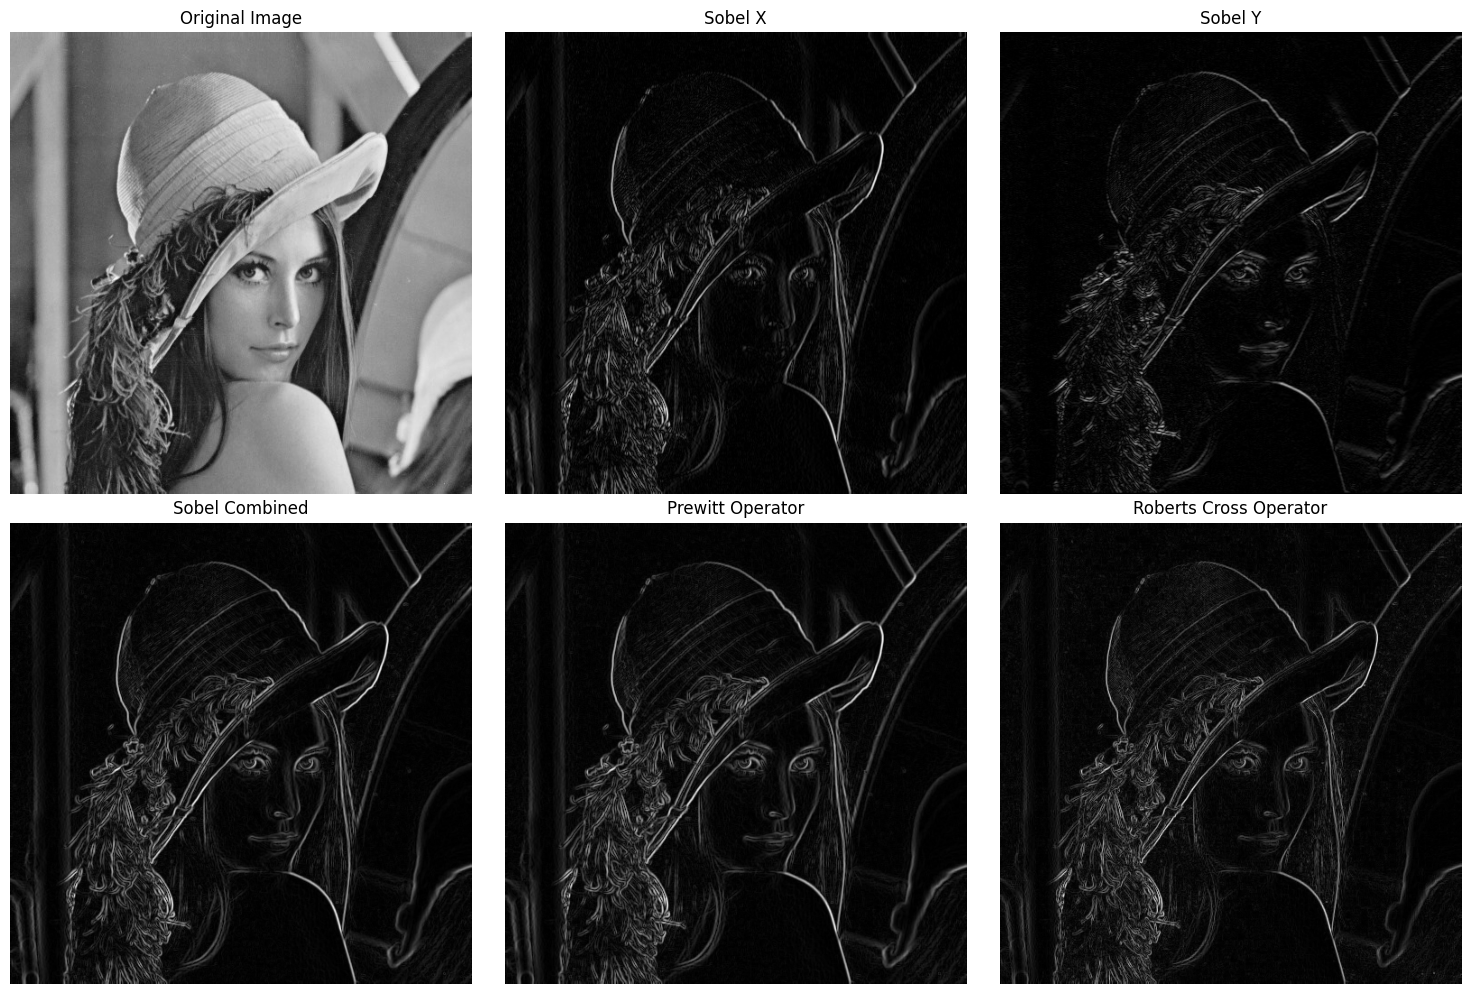

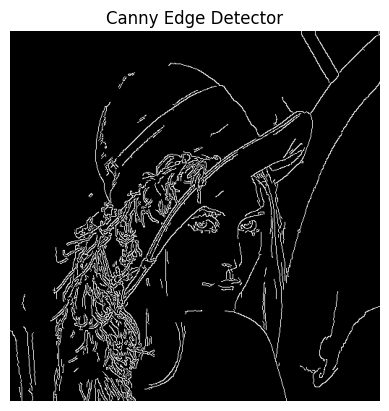

In [ ]:
class Solution:
    def edgeDetection(self, image_path):
        bgr_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # 1. Sobel Operator
        sobel_x = cv2.Sobel(bgr_image, cv2.CV_64F, 1, 0, ksize=3)
        sobel_y = cv2.Sobel(bgr_image, cv2.CV_64F, 0, 1, ksize=3)
        sobel_combined = cv2.magnitude(sobel_x, sobel_y)

        # 2. Prewitt Operator
        prewitt_edge = prewitt(bgr_image)

        # 3. Roberts Cross Operator
        roberts_edge = roberts(bgr_image)

        # 4. Canny Edge Detector
        canny_edge = cv2.Canny(bgr_image, 100, 200)

        fig, axes = plt.subplots(2, 3, figsize=(15,10))
        axes = axes.ravel()

        axes[0].imshow(bgr_image, cmap='gray')
        axes[0].set_title("Original Image")
        axes[0].axis('off')

        axes[1].imshow(np.abs(sobel_x), cmap='gray')
        axes[1].set_title("Sobel X")
        axes[1].axis('off')

        axes[2].imshow(np.abs(sobel_y), cmap='gray')
        axes[2].set_title("Sobel Y")
        axes[2].axis('off')

        axes[3].imshow(sobel_combined, cmap='gray')
        axes[3].set_title("Sobel Combined")
        axes[3].axis('off')

        axes[4].imshow(prewitt_edge, cmap='gray')
        axes[4].set_title("Prewitt Operator")
        axes[4].axis('off')

        axes[5].imshow(roberts_edge, cmap='gray')
        axes[5].set_title("Roberts Cross Operator")
        axes[5].axis('off')

        plt.tight_layout()
        plt.figure()
        plt.imshow(canny_edge, cmap='gray')
        plt.title("Canny Edge Detector")
        plt.axis('off')
        plt.show()

solution = Solution()
solution.edgeDetection('/content/img1.jpeg')

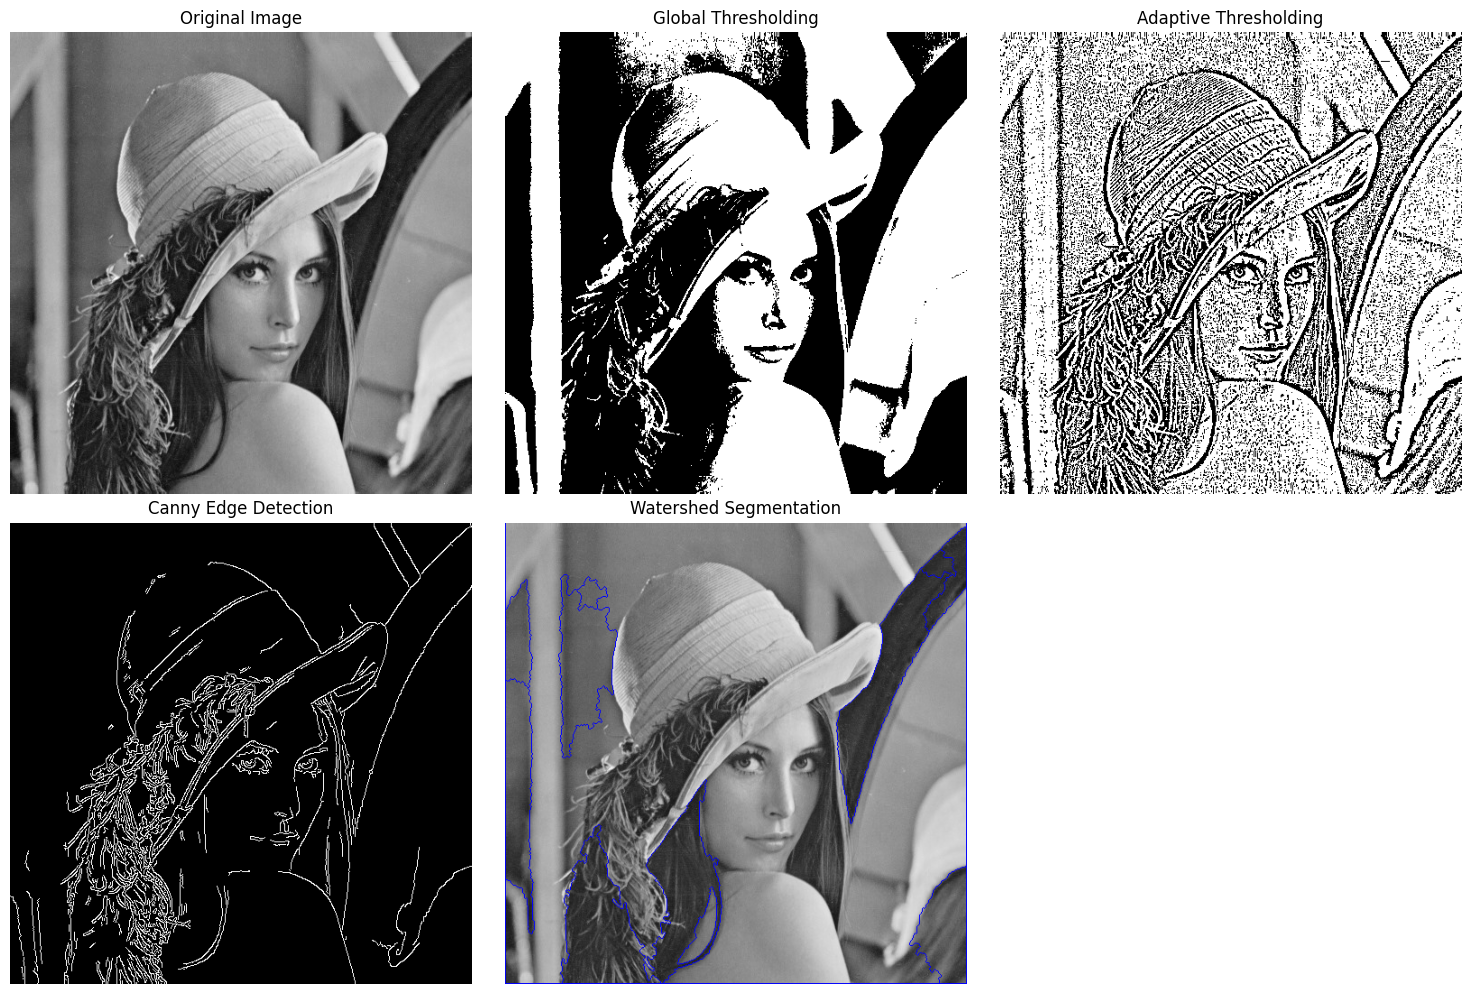

In [ ]:
class Solution:
    def imageSegmentation(self, image_path):
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # Global Thresholding
        _, global_thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

        # Adaptive Thresholding
        adaptive_thresh = cv2.adaptiveThreshold(
            image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

        # Edge Detection for Segmentation (Canny Edge Detection)
        edges = cv2.Canny(image, 100, 200)

        # Region-Based Segmentation (Watershed Algorithm)
        image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

        _, binary = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

        # Noise removal using morphological operations
        kernel = np.ones((3, 3), np.uint8)
        opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)

        # Sure background
        sure_bg = cv2.dilate(opening, kernel, iterations=3)

        # Sure foreground (distance transform and thresholding)
        dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
        _, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

        # Unknown region
        sure_fg = np.uint8(sure_fg)
        unknown = cv2.subtract(sure_bg, sure_fg)

        # Marker labelling
        _, markers = cv2.connectedComponents(sure_fg)
        markers = markers + 1
        markers[unknown == 255] = 0

        # Watershed
        cv2.watershed(image_color, markers)
        watershed_result = image_color.copy()
        watershed_result[markers == -1] = [255, 0, 0]

        fig, axes = plt.subplots(2, 3, figsize=(15, 10))
        axes = axes.ravel()

        axes[0].imshow(image, cmap='gray')
        axes[0].set_title("Original Image")
        axes[0].axis('off')

        axes[1].imshow(global_thresh, cmap='gray')
        axes[1].set_title("Global Thresholding")
        axes[1].axis('off')

        axes[2].imshow(adaptive_thresh, cmap='gray')
        axes[2].set_title("Adaptive Thresholding")
        axes[2].axis('off')

        axes[3].imshow(edges, cmap='gray')
        axes[3].set_title("Canny Edge Detection")
        axes[3].axis('off')

        axes[4].imshow(cv2.cvtColor(watershed_result, cv2.COLOR_BGR2RGB))
        axes[4].set_title("Watershed Segmentation")
        axes[4].axis('off')

        fig.delaxes(axes[5])
        plt.tight_layout()
        plt.show()

solution = Solution()
solution.imageSegmentation('/content/img1.jpeg')